In [186]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# I imported all necessary libraries and modules i would be using for this process, 
# I would have imported all the libraries at once but for the sake of collaboration, I imported them as needed

In [187]:
sns.set({"figure.figsize": (20,20)})

# This I used to set my size of my diargrams which would be used later on in the code,
# for visualisation and storytelling purpose

In [188]:
startup = pd.read_csv(r"C:\Users\user\Downloads\Hamoye Project\startup data.csv")
startup.head()

# Next up, I used the read_csv function form pandas to view my data, 
# the head() function giving me accress to the first five rows of my datasets

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [189]:
startup.info()

# The info() function give me all the necessary information I need to have about all the features of my dataset
# e.g. The number of nan values in a column, the type of each column, the number of instances I have 
# and the memory the dataset uses in my storage disk

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [190]:
startup.columns

# This gave a list of all the columns in the startup dataset

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status'],
      dtype='object')

In [191]:
for i in ['zip_code', 'id', "name", "Unnamed: 6", "city", "object_id", "state_code.1", 
          "closed_at", "Unnamed: 0", "longitude", "latitude", "labels"]:
    del startup[i]
    
    
# So after a very close crutiny at the dataset, I realised there were a lot of redundant columns that didn't 
# add an value to the target and to the whole objective at hand, and all these were based on personal opinion

# Zip_code, ID, Unnamed: 6, object_id, Unnamed: 0 : This doesn't have any relationship to whether a startup will succeed or fail

# Longitude, Latitude, city: This would still make inferences to the location of the place which we already have in terms of
#                         the state code column given.

# Labels: This were already dummy variables of the status of the company; closed or acquired. And since that was already 
#         given, this column was redundant\

# Closed_at: This is a column with a lot of missing values and even as this is still logical as 
#            successful startups will still be running in the present, There are little to no inferences that could be made with them

In [192]:
for i in ['founded_at', 'first_funding_at', 'last_funding_at']:
    startup[i] = pd.to_datetime(startup[i])
    
# So as someone suggested, datetime was important and I had to read up how to work with datetime dtypes to do this
# This was just me converting them from the object dtype to datetime dtypes as they should be

In [193]:
categorical_feats = [i for i in startup.columns if startup[i].dtypes == "O"]
numerical_feats = [i for i in startup.columns if i not in categorical_feats]

# This seperated my columns of discrete nature from columns with numerical and continous values

In [194]:
for i in categorical_feats:
    print("The unique values in {} are {}".format(i, startup[i].unique()), end = "\n")
    print()
    
# This was to get the unqiue values in each categorical column that was in my dataset

The unique values in state_code are ['CA' 'MA' 'KY' 'NY' 'CO' 'VA' 'TX' 'WA' 'IL' 'NC' 'PA' 'GA' 'NH' 'MO'
 'FL' 'NJ' 'WV' 'MI' 'DC' 'CT' 'MD' 'OH' 'TN' 'MN' 'RI' 'OR' 'UT' 'ME'
 'NV' 'NM' 'IN' 'AZ' 'ID' 'AR' 'WI']

The unique values in category_code are ['music' 'enterprise' 'web' 'software' 'games_video' 'network_hosting'
 'finance' 'mobile' 'education' 'public_relations' 'security' 'other'
 'photo_video' 'hardware' 'ecommerce' 'advertising' 'travel' 'fashion'
 'analytics' 'consulting' 'biotech' 'cleantech' 'search' 'semiconductor'
 'social' 'medical' 'automotive' 'messaging' 'manufacturing' 'hospitality'
 'news' 'transportation' 'sports' 'real_estate' 'health']

The unique values in status are ['acquired' 'closed']



In [195]:
startup.columns

# This was to access the columns list again to see what I am working with

Index(['state_code', 'founded_at', 'first_funding_at', 'last_funding_at',
       'age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB',
       'has_roundC', 'has_roundD', 'avg_participants', 'is_top500', 'status'],
      dtype='object')

In [196]:
startup = pd.get_dummies(startup, columns = ["status"])

# This was to create dummies of the status column, turning the acquired into 1s and closed into 0s for easier operations

In [197]:
startup.head()

# This was to have a look at my dataset again

,state_code,founded_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,...,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status_acquired,status_closed
0,CA,2007-01-01,2009-04-01,2010-01-01,2.2493,3.0027,4.6685,6.7041,3,3,...,0,1,0,0,0,0,1.0000,0,1,0
1,CA,2000-01-01,2005-02-14,2009-12-28,5.1260,9.9973,7.0055,7.0055,9,4,...,1,0,0,1,1,1,4.7500,1,1,0
2,CA,2009-03-18,2010-03-30,2010-03-30,1.0329,1.0329,1.4575,2.2055,5,1,...,0,0,1,0,0,0,4.0000,1,1,0
3,CA,2002-01-01,2005-02-17,2007-04-25,3.1315,5.3151,6.0027,6.0027,5,3,...,0,0,0,1,1,1,3.3333,1,1,0
4,CA,2010-08-01,2010-08-01,2012-04-01,0.0000,1.6685,0.0384,0.0384,2,2,...,1,1,0,0,0,0,1.0000,1,0,1


In [199]:
del startup["status_closed"]
startup.rename(columns = {"status_acquired":"status"}, inplace = True)

# My dummies created two columns so I deleted one and renamed the other column to make the column names easier to handle

In [200]:
Nan_columns = [i for i in startup.columns if startup[i].isnull().sum() != 0]
Nan_columns

# This was to get columns with missing values

['age_first_milestone_year', 'age_last_milestone_year']

In [201]:
for i in ['age_first_milestone_year', 'age_last_milestone_year']:
    startup[i] = startup[i].fillna(np.mean(startup[i]))
    
# Started preprocessing by filling in my missing values with the mean of those columns

In [202]:
startup["diff_in_fundyears"] = startup["last_funding_at"] - startup["first_funding_at"]
startup["diff_in_fundyears"] = startup["diff_in_fundyears"] / np.timedelta64(1, "Y")

startup["Founded_year"] = pd.DatetimeIndex(startup["founded_at"]).year

# This might need to be explained in th meeting

In [203]:
startup["age_diff_in_milestone"] = startup["age_last_milestone_year"] - startup["age_first_milestone_year"]

# Same as cell above

In [204]:
startup.head()

# To have a view of my dataset again

,state_code,founded_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,...,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,diff_in_fundyears,Founded_year,age_diff_in_milestone
0,CA,2007-01-01,2009-04-01,2010-01-01,2.2493,3.0027,4.6685,6.7041,3,3,...,0,0,0,0,1.0000,0,1,0.752924,2007,2.0356
1,CA,2000-01-01,2005-02-14,2009-12-28,5.1260,9.9973,7.0055,7.0055,9,4,...,0,1,1,1,4.7500,1,1,4.867999,2000,0.0000
2,CA,2009-03-18,2010-03-30,2010-03-30,1.0329,1.0329,1.4575,2.2055,5,1,...,1,0,0,0,4.0000,1,1,0.000000,2009,0.7480
3,CA,2002-01-01,2005-02-17,2007-04-25,3.1315,5.3151,6.0027,6.0027,5,3,...,0,1,1,1,3.3333,1,1,2.182112,2002,0.0000
4,CA,2010-08-01,2010-08-01,2012-04-01,0.0000,1.6685,0.0384,0.0384,2,2,...,0,0,0,0,1.0000,1,0,1.667385,2010,0.0000


In [205]:
startup.info()

# To have an insight of the data at this point

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   state_code                923 non-null    object        
 1   founded_at                923 non-null    datetime64[ns]
 2   first_funding_at          923 non-null    datetime64[ns]
 3   last_funding_at           923 non-null    datetime64[ns]
 4   age_first_funding_year    923 non-null    float64       
 5   age_last_funding_year     923 non-null    float64       
 6   age_first_milestone_year  923 non-null    float64       
 7   age_last_milestone_year   923 non-null    float64       
 8   relationships             923 non-null    int64         
 9   funding_rounds            923 non-null    int64         
 10  funding_total_usd         923 non-null    int64         
 11  milestones                923 non-null    int64         
 12  is_CA                 

In [206]:
startup.describe()

# This give statistical analysis to numerical columns telling their mean, std, min, max, etc.

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,...,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,diff_in_fundyears,Founded_year,age_diff_in_milestone
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,9.230000e+02,923.000000,923.000000,923.000000,...,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,2.235630,3.931456,3.055353,4.754423,7.710726,2.310943,2.541975e+07,1.841820,0.527627,0.114843,...,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317,0.646804,1.694699,2005.496208,1.699070
std,2.510449,2.967910,2.720615,2.935418,7.265776,1.390922,1.896344e+08,1.322632,0.499507,0.319005,...,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052,0.478222,1.935245,3.528738,1.897426
min,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,1.100000e+04,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1984.000000,0.000000
25%,0.576700,1.669850,1.252100,2.930150,3.000000,1.000000,2.725000e+06,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000,0.000000,0.000000,2003.000000,0.000000
50%,1.446600,3.528800,3.055353,4.754423,5.000000,2.000000,1.000000e+07,2.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000,1.000000,1.084211,2006.000000,1.698600
75%,3.575350,5.560250,4.002700,6.039750,10.000000,3.000000,2.472500e+07,3.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000,1.000000,2.792665,2008.000000,2.186250
max,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,5.700000e+09,8.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000,1.000000,10.811995,2013.000000,16.378100


In [207]:
startup.corr()

# This was to check for closely related columns and since this is not a regression issue, I wasnt really bothered by which
# features correlated with my target, I just checked for correlations with one another

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,...,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,diff_in_fundyears,Founded_year,age_diff_in_milestone
age_first_funding_year,1.000000,0.762382,0.496205,0.394630,-0.187817,-0.155478,0.046350,-0.295894,-0.010800,-0.128102,...,-0.293081,-0.060532,0.033388,0.121338,0.114363,0.050638,-0.075637,-0.127944,-0.762626,-0.100967
age_last_funding_year,0.762382,1.000000,0.609392,0.560273,0.073080,0.385999,0.116371,-0.122905,0.006190,-0.143312,...,-0.099762,0.258928,0.317469,0.312340,0.122893,0.200727,0.073731,0.544266,-0.793388,-0.007002
age_first_milestone_year,0.496205,0.609392,1.000000,0.777484,0.228376,0.177490,0.063778,-0.042805,0.030722,-0.089866,...,0.013639,0.175763,0.190118,0.234193,0.051471,0.136128,0.140320,0.290688,-0.594951,-0.231036
age_last_milestone_year,0.394630,0.560273,0.777484,1.000000,0.324402,0.238272,0.093351,0.261821,0.054979,-0.087041,...,0.103179,0.241107,0.253532,0.233745,0.077135,0.181288,0.229893,0.347085,-0.589688,0.432261
relationships,-0.187817,0.073080,0.228376,0.324402,1.000000,0.358883,0.093790,0.513835,0.105754,0.049912,...,0.317130,0.285015,0.259842,0.207488,0.115061,0.222207,0.360434,0.355481,0.016476,0.174412
funding_rounds,-0.155478,0.385999,0.177490,0.238272,0.358883,1.000000,0.115800,0.230162,0.010258,0.007431,...,0.260598,0.444454,0.440923,0.323620,0.043044,0.259345,0.206049,0.793134,-0.094448,0.114126
funding_total_usd,0.046350,0.116371,0.063778,0.093351,0.093790,0.115800,1.000000,0.012056,-0.027545,-0.024488,...,-0.023721,0.020119,0.045405,0.045146,0.046250,0.048978,0.040176,0.118264,-0.059259,0.052971
milestones,-0.295894,-0.122905,-0.042805,0.261821,0.513835,0.230162,0.012056,1.000000,0.036172,0.104795,...,0.319986,0.195162,0.085329,0.020663,0.043533,0.171412,0.328260,0.195223,0.199491,0.466427
is_CA,-0.010800,0.006190,0.030722,0.054979,0.105754,0.010258,-0.027545,0.036172,1.000000,-0.380683,...,0.076151,0.093337,0.074752,0.083008,0.069158,0.098677,0.077217,0.023487,-0.015170,0.041005
is_NY,-0.128102,-0.143312,-0.089866,-0.087041,0.049912,0.007431,-0.024488,0.104795,-0.380683,1.000000,...,0.021334,-0.066628,-0.061830,-0.063132,0.068394,-0.015463,0.059996,-0.053572,0.174781,-0.005802


<AxesSubplot:>

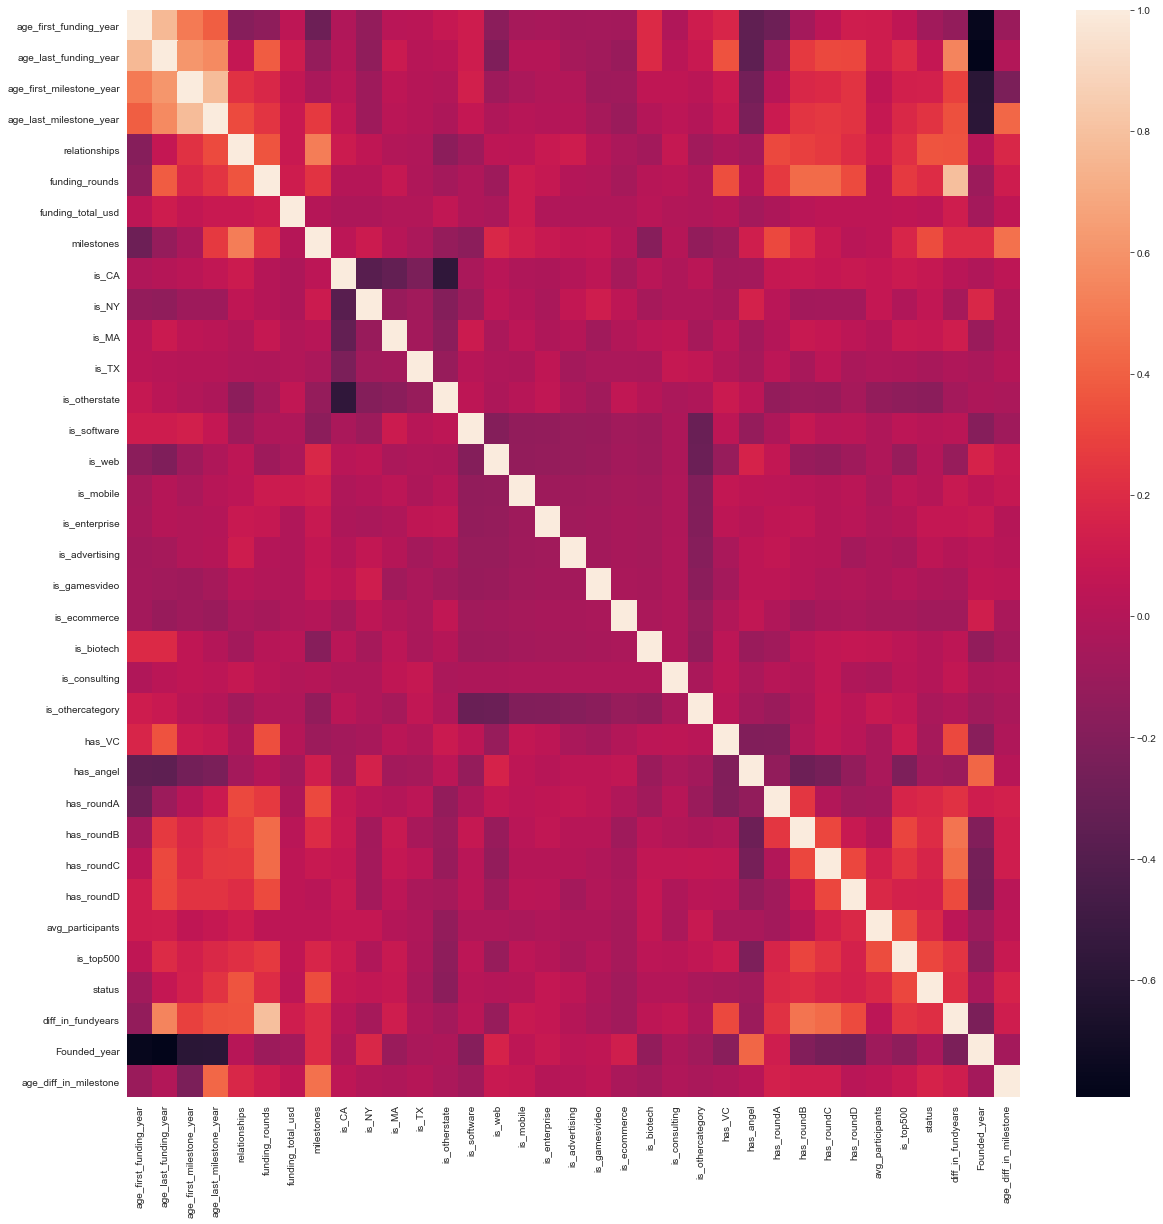

In [208]:
sns.heatmap(startup.corr())

# This plot made me discover that funding years, first and last as well as milestone years, first and last 
# had strong relationships with one another, Founded year, a new column i created also had a very stron relationship with the 
# aforementioned columns, funding rounds also had a strong relationship with diff in years, a column I created and others are 
# negligible.

<AxesSubplot:xlabel='status', ylabel='count'>

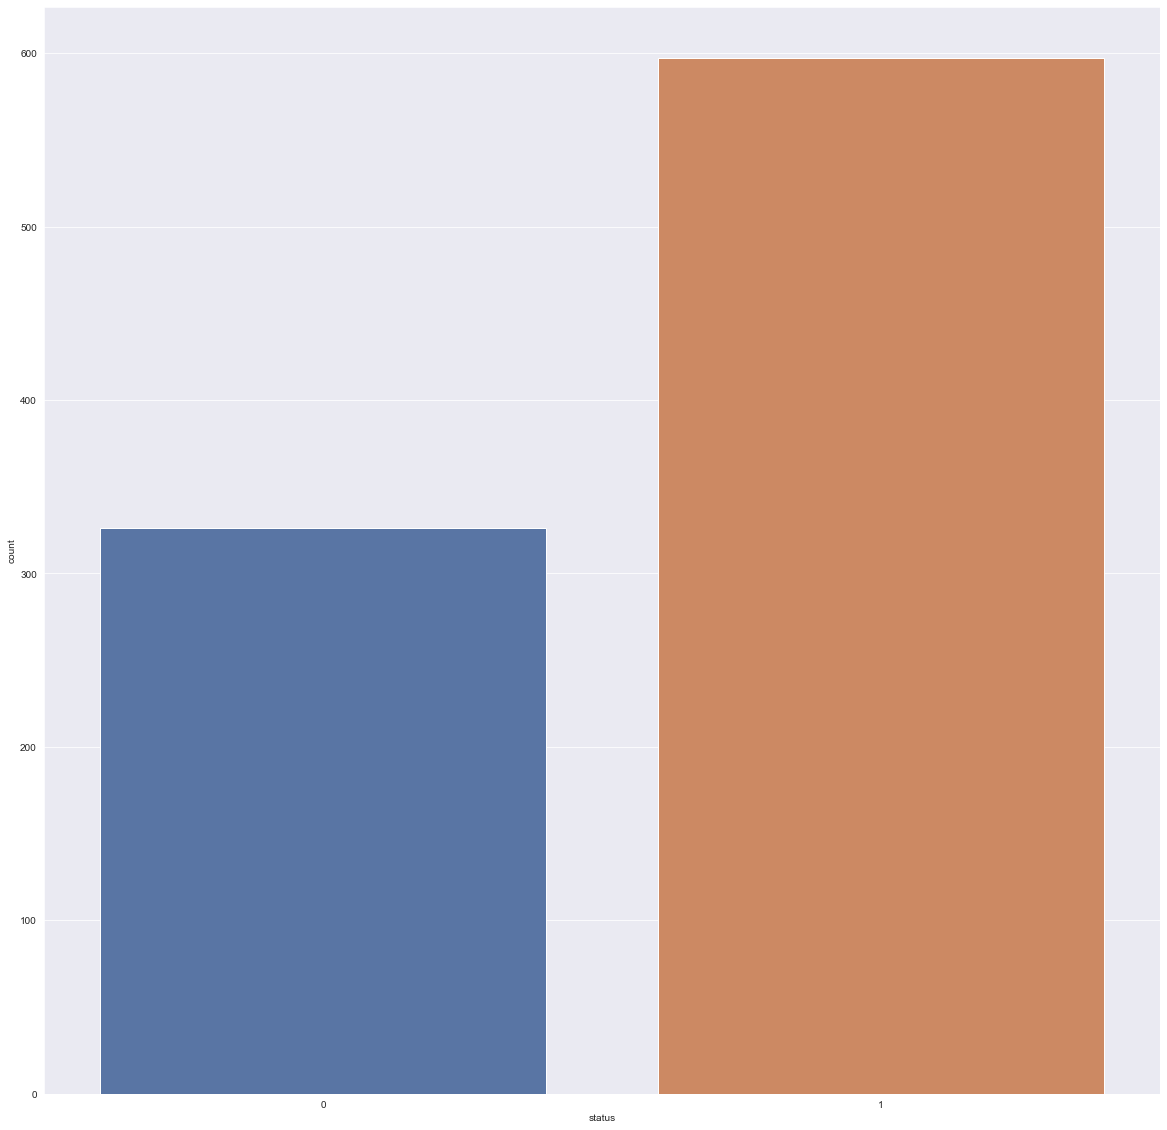

In [209]:
sns.countplot(x = "status", data = startup)

# From this we can infer that this is a balanced dataset and that there were more acquired startups than failed startups

<AxesSubplot:xlabel='Funding_bins', ylabel='count'>

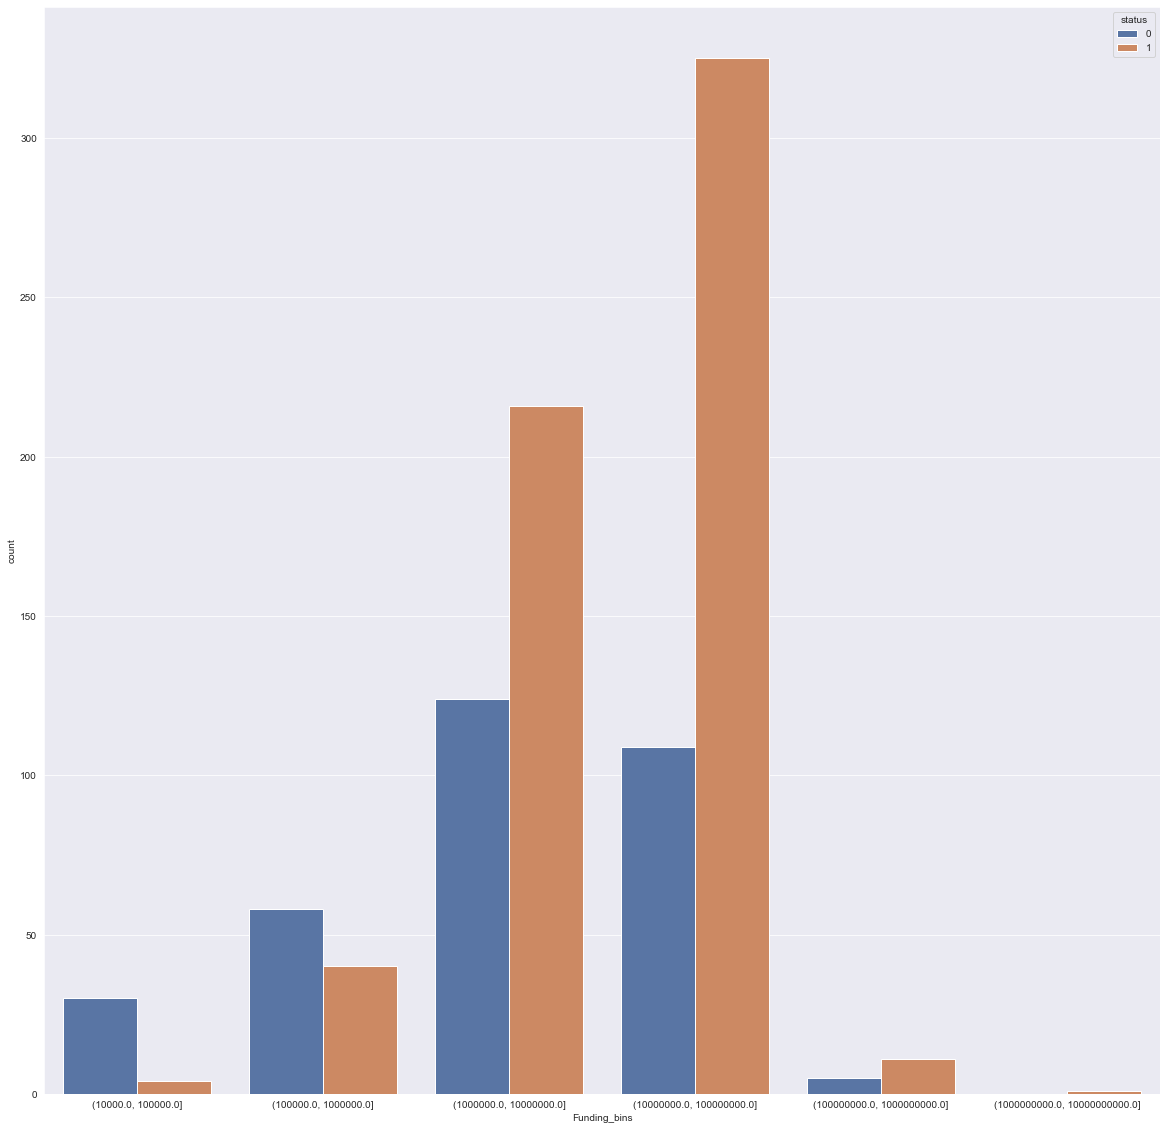

In [210]:
startup["Funding_bins"] = pd.cut(startup["funding_total_usd"], [1e4, 1e5, 1e6, 1e7, 1e8, 1e9, 1e10])
sns.countplot(x = "Funding_bins", data = startup, hue = "status")

# I tried to visualize the relationship between funding rounds and startup success. And it can be infered that startups with 
# $1e6 which is $1000000 have more successes than failures, with the most sucesses to startups with funding of about
# $10,000,000 to $100,000,000 in funds

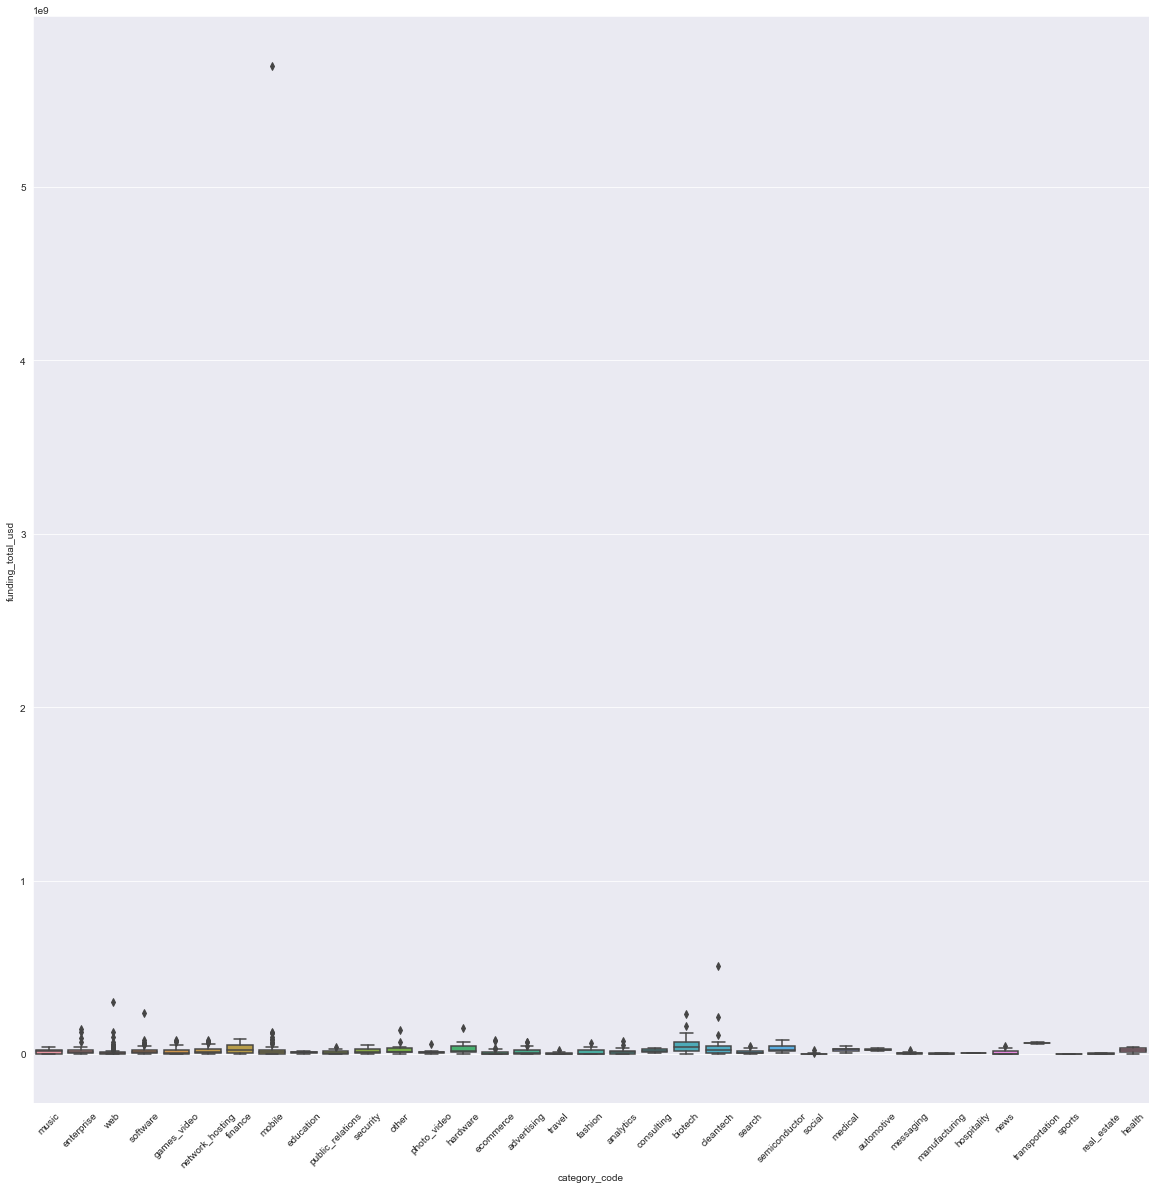

In [211]:
sns.boxplot(x = "category_code", y = "funding_total_usd", data = startup)
plt.xticks(rotation = 45)
plt.show()

# This boxplot showed the major outliers that existed in the data which is still a work in progress but majorly it showed that
# a startup in the mobile category had the largest funding as a startup, closely followed by deantech and then web

<AxesSubplot:xlabel='Founded_year', ylabel='count'>

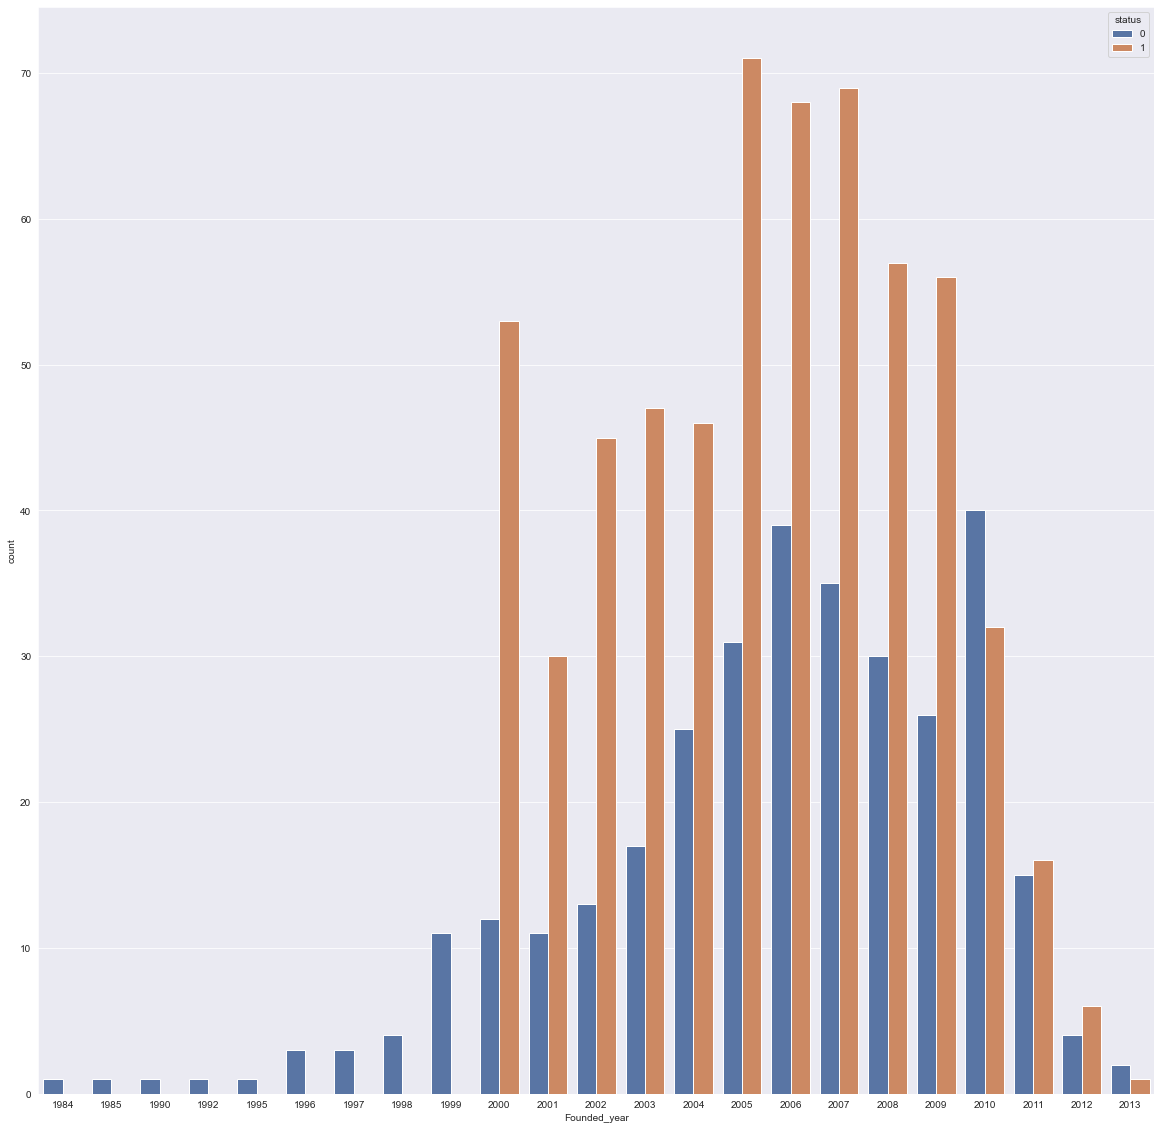

In [212]:
sns.countplot(x = "Founded_year", data = startup, hue = "status")

# With this plot we can infer that 2005 was a great founding year for startups, it could be due to some economic boom or 
# an increase in funding, closely followed by 2007 and 2006, it can also be infered that every year from 1984 to 1999, was 
# a failure and the highest failure of startups occurred in 2010, closely followed by 2006

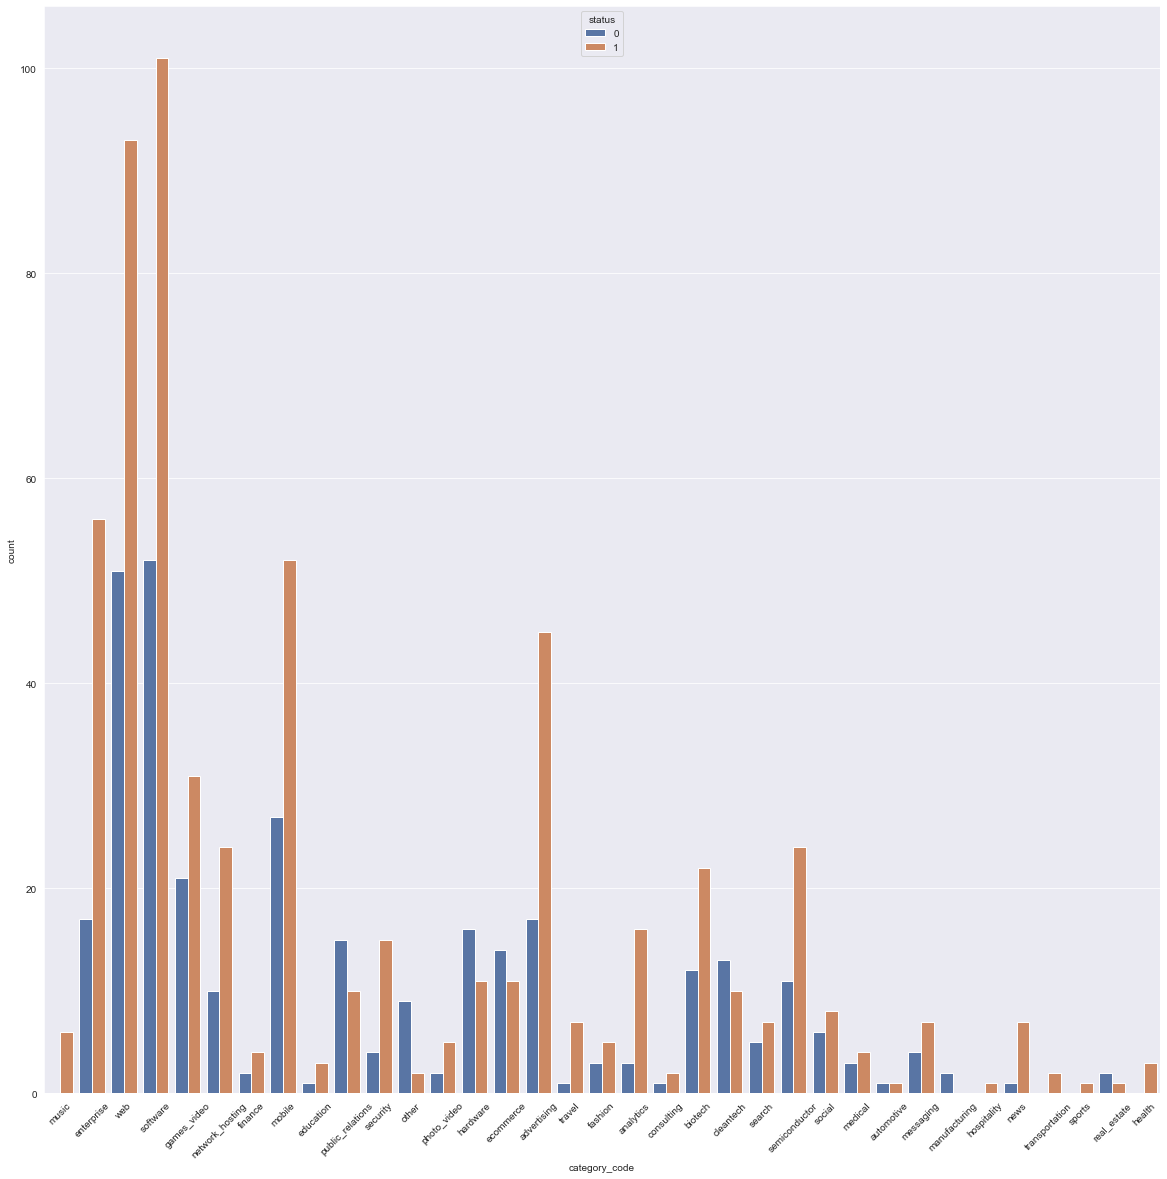

In [213]:
sns.countplot(x = "category_code", data = startup, hue = "status")
plt.xticks(rotation = 45)
plt.show()

# This plot shows that the most successful category code is software, followed by web and then enterprise 
# with the highest failures in software, web and then mobile. 

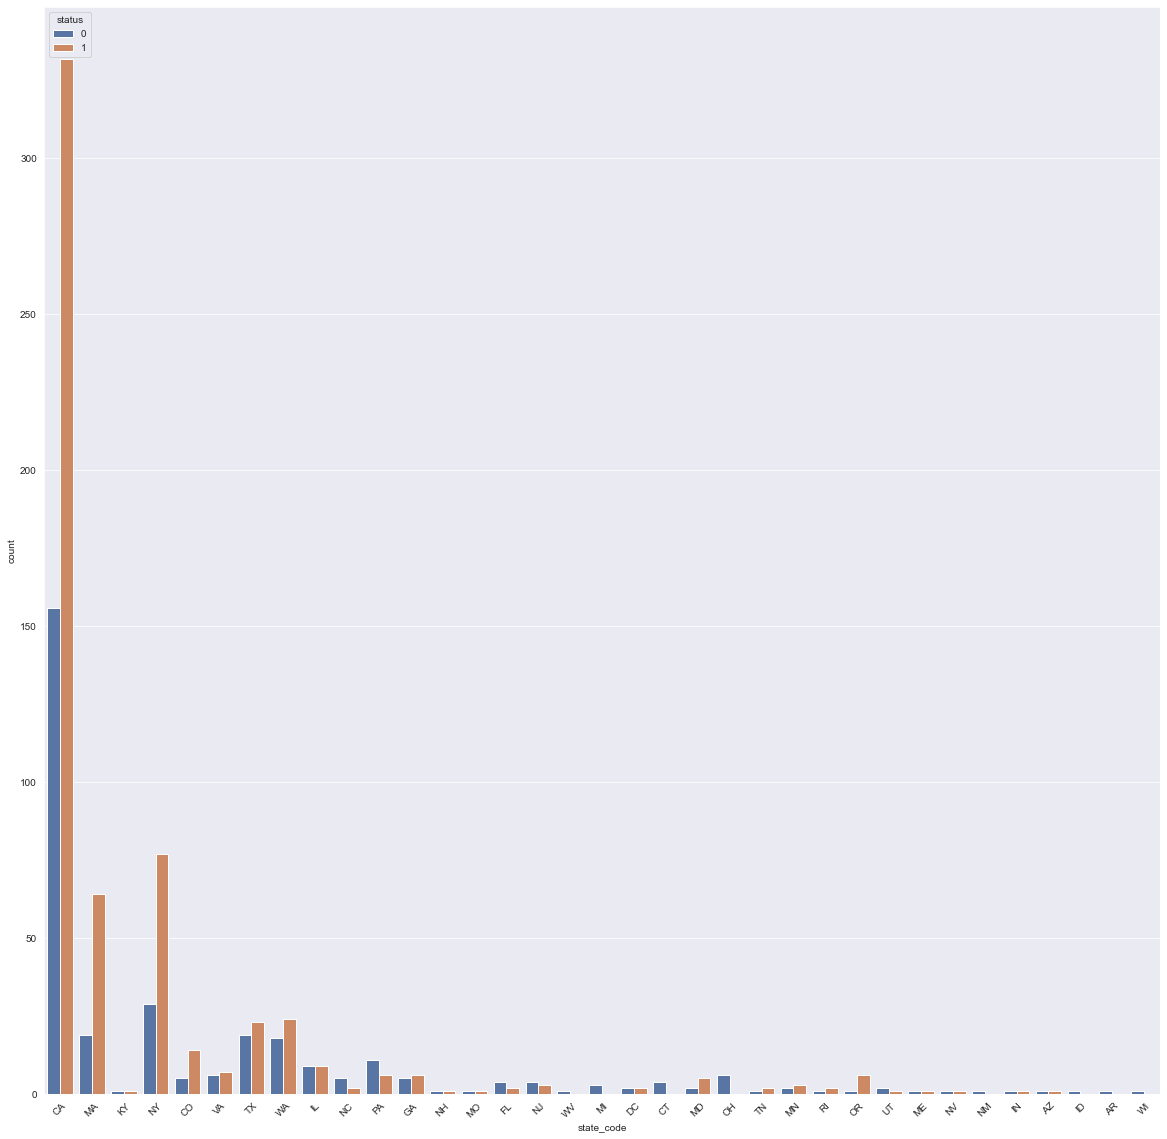

In [214]:
sns.countplot(x = "state_code", data = startup, hue = "status")
plt.xticks(rotation = 45)
plt.show()

# This shows a relationship between the statecode and success rates, each state code representing a state in the US. 
# With the highest startups is California, followed by New York and Massachusetts also withe highest number of failures 
# emanating in that same order.

In [ ]:
sns.